# R_0 and R_t

This notebook shows the calculation of the number R_0 and R_t for the epidemic modeled by the SEIR model. This indicator is often the subject of misunderstanding in public space, mainly because R_0 is not distinguished from R_t, which are two completely different indicators. 

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.rcParams["figure.figsize"]=(12,4)

## Development of the epidemic in the SIR model 

This part calculates the SEIR model 

In [2]:
population = 10_000_000   #Number of people in the population
initialy_infected=1       #Number of the initialy infected people

In [3]:
def sir_calculation(contacts, infection_rate, recovery_rate,simulations=200, 
                   ):
    """This function calculates SIR model"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again

    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        infected[t+1]=infected[t]+infected[t]*contacts*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
    pyplot.plot(susceptiable,label="Susceptiable")
    pyplot.plot(infected,label="Infected")
    pyplot.plot(recovered,label="Recovered/Dead")

## R_0

This part shows the calculation of the number R_0, which is constant throughout the epidemic (unlike R_t, which changes with the development of the epidemic)

In [4]:
def R_0(contacts, infection_rate, recovery_rate):
    R_0=(contacts*infection_rate)/recovery_rate
    R_0=round(R_0,2)
    
    print(f"R_0 of the disease: {R_0}")

In [5]:
contacts= 3            #How many contacts per day has an average person T
infection_rate=0.10    #Probability of getting infected with contact with an infected person T
recovery_rate = 0.1    #Rate of recovery

R_0(contacts, infection_rate, recovery_rate)

R_0 of the disease: 3.0


## R_t

This section shows the calculation of the R_t number during an epidemic 

In [6]:
def moving_Rt(contacts, infection_rate, recovery_rate,simulations=200,population=10_000_000, initialy_infected=1):
    """Že nemusí být v tomhle modelu klouzavý týden, není tam vliv dne v týdnu"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    moving_R = np.zeros([simulations])     
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
            
        infected[t+1]=infected[t]+infected[t]*contacts*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        moving_R[t+1]=infected[t+1]/infected[t]
            
    pyplot.plot(moving_R[3:],label=f"Recovery rate: {recovery_rate}, contact rate: {contacts}",color="maroon")

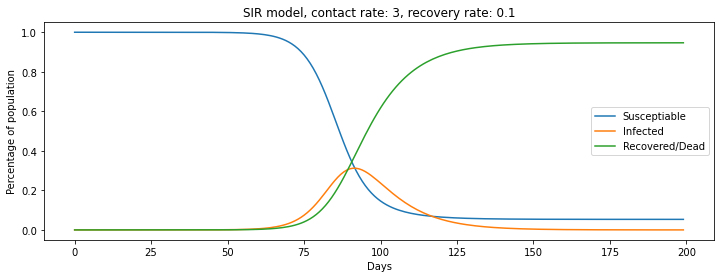

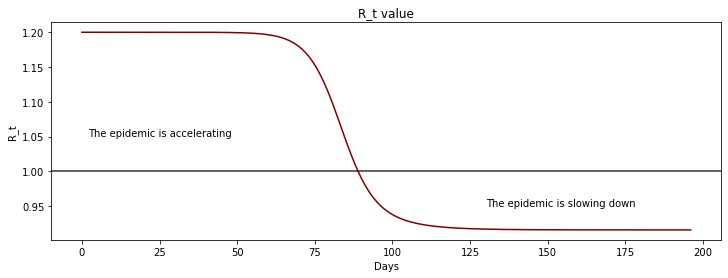

R_0 of the disease: 3.0


In [7]:
sir_calculation(contacts, infection_rate, recovery_rate)
    
pyplot.legend()
pyplot.title(f"SIR model, contact rate: {contacts}, recovery rate: {recovery_rate}")
pyplot.gcf().set_size_inches((12, 4))
pyplot.xlabel("Days")
pyplot.ylabel("Percentage of population")
pyplot.show()

moving_Rt(contacts, infection_rate, recovery_rate)
pyplot.axhline(1,color="black", alpha=0.8)
pyplot.title("R_t value")
pyplot.ylabel("R_t")
pyplot.xlabel("Days")
pyplot.text(2, 1.05,"The epidemic is accelerating",color="black")
pyplot.text(130, 0.95,"The epidemic is slowing down ",color="black")
pyplot.show()

R_0(contacts, infection_rate, recovery_rate)